# ACOS vs OCO-2 Data Comparison

ACOS Importing and Augmenting

In [2]:
import netCDF4 as nc
import xarray as xr

from pykrige.ok import OrdinaryKriging
from scipy.spatial import cKDTree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import matplotlib.colors as mcolors
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random

Single day ACOS importing to assess kriging accuracy

In [3]:
acos_ds = nc.Dataset('acos_LtCO2_141007_v205205_B9213A_200311061903s.nc4', 'r')

In [ ]:
print(acos_ds)

In [4]:
print(acos_ds.variables.keys()) 

dict_keys(['sounding_id', 'levels', 'bands', 'date', 'latitude', 'longitude', 'time', 'solar_zenith_angle', 'sensor_zenith_angle', 'xco2_quality_flag', 'xco2_qf_bitflag', 'source_files', 'file_index', 'xco2', 'xco2_uncertainty', 'xco2_apriori', 'pressure_levels', 'co2_profile_apriori', 'xco2_averaging_kernel', 'pressure_weight'])


In [5]:
# Access variables
acos_co2 = acos_ds.variables['xco2'][:] # CO2 mole fractions
acos_lat = acos_ds.variables['latitude'][:]  # Latitude values
acos_long = acos_ds.variables['longitude'][:]  # Longitude values

In [6]:
# Flatten to 1D arrays
acos_co2 = acos_co2.flatten()
acos_lat = acos_lat.flatten()
acos_long = acos_long.flatten()

In [7]:
acos_co2.shape

(1940,)

In [8]:
acos = pd.DataFrame({
    'CO2': acos_co2,
    'Latitude': acos_lat,
    'Longitude': acos_long
})

In [9]:
acos.head(5)

,CO2,Latitude,Longitude
0,399.217316,-72.231758,166.148544
1,402.074615,-72.226524,166.156464
2,395.578522,-72.959572,164.812057
3,388.198547,-72.942451,164.845215
4,397.402557,-72.937546,164.853226


In [10]:
print('Latitude Max: ' + str(acos['Latitude'].max()))
print('Latitude Min: ' + str(acos['Latitude'].min()))
print('Longitude Max: ' + str(acos['Longitude'].max()))
print('Longitude Min: ' + str(acos['Longitude'].min()))

Latitude Max: 69.88907623291016
Latitude Min: -81.52764129638672
Longitude Max: 178.8954315185547
Longitude Min: -163.89590454101562


In [11]:
acos_co2 = np.array(acos_co2)
acos_lat = np.array(acos_lat)
acos_long = np.array(acos_long)

Krigging for ACOS

In [2]:
centres = np.array([
    [6.4471, 50.8659],
    [133.6400, -22.2870],
    [-52.9249, 5.2788],
    [-121.6470, 38.1152],
    [-90.2723, 45.9459],
    [-2.6942, 5.2685],
    [-110.8660, 31.8214],
    [8.4104, 47.2102],
    [13.5881, 41.8494],
    [-90.0799, 45.8059],
    [140.5891, -34.0021],
    [-109.9420, 31.7365],
    [11.3275, 47.8064],
    [-110.0520, 31.7438],
    [8.1517, 40.6062]
])

In [14]:
# Store results
acos_results = []

start = time.time()
for centre in centres:
    loop_start = time.time()
    # Apply Kriging
    kriging_model = OrdinaryKriging(
        acos_long,
        acos_lat,
        acos_co2,
        variogram_model='spherical',
        verbose=False,
        enable_plotting=False
    )
    
    # Predict CO2 at the centre point  
    predicted_value, ss = kriging_model.execute('points', [centre[0]], [centre[1]])
    acos_results.append({'centre': centre, 'prediction': round(predicted_value[0],4), 'error': round(ss[0],2)})
    loop_end = time.time()
    loop_time = loop_end - loop_start
    print('Centre: ' + str(centre) + ' complete. Time taken: ' + str(round(loop_time,2)) + ' seconds.')
    
end = time.time()
time_taken = end - start
print('Overall time taken: ' + str(round(time_taken,2)) + ' seconds')

# Print the estimated CO2 levels at centre points
for res in acos_results:
    print(f"Estimated CO2 at {res['centre']}: {round(res['prediction'],2)} ppm with error {round(res['error'],4)}")

Center: [ 6.4471 50.8659] complete. Time taken: 8.46 seconds.
Center: [133.64  -22.287] complete. Time taken: 8.77 seconds.
Center: [-52.9249   5.2788] complete. Time taken: 6.22 seconds.
Center: [-121.647    38.1152] complete. Time taken: 7.57 seconds.
Center: [-90.2723  45.9459] complete. Time taken: 10.01 seconds.
Center: [-2.6942  5.2685] complete. Time taken: 4.5 seconds.
Center: [-110.866    31.8214] complete. Time taken: 7.62 seconds.
Center: [ 8.4104 47.2102] complete. Time taken: 8.33 seconds.
Center: [13.5881 41.8494] complete. Time taken: 12.15 seconds.
Center: [-90.0799  45.8059] complete. Time taken: 7.65 seconds.
Center: [140.5891 -34.0021] complete. Time taken: 7.9 seconds.
Center: [-109.942    31.7365] complete. Time taken: 6.48 seconds.
Center: [11.3275 47.8064] complete. Time taken: 11.71 seconds.
Center: [-110.052    31.7438] complete. Time taken: 10.37 seconds.
Center: [ 8.1517 40.6062] complete. Time taken: 6.92 seconds.
Overall time taken: 124.68 seconds
Estimated

Error average around 11-12

In [16]:
acos_co2_list = acos_co2.tolist()
acos_long_list = acos_long.tolist()
acos_lat_list = acos_lat.tolist()

OCO-2 Importing and Augmenting

Same thing for OCO-2

In [1]:
oco_ds = nc.Dataset('oco2_LtCO2_20140906.nc4', 'r')

NameError: name 'nc' is not defined

In [5]:
print(oco_ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    filter_function: oco2_xco2_quality_flag_b11_1
    bc_function: oco2_xco2_bias_correct_b11_1
    l2_reader: read_oco_l2_b11
    lite_definition_module: lite_file_definition_oco2_b11_1
    met_files: ['oco2_L2MetND_00958a_140906_B11006r_220907002622.h5', 'oco2_L2MetND_00959a_140906_B11006r_220907004605.h5', 'oco2_L2MetND_00960a_140906_B11006r_220907003854.h5', 'oco2_L2MetND_00961a_140906_B11006r_220907020329.h5', 'oco2_L2MetND_00962a_140906_B11006r_220907002515.h5', 'oco2_L2MetND_00963a_140906_B11006r_220907002610.h5', 'oco2_L2MetND_00964a_140906_B11006r_220907000315.h5', 'oco2_L2MetND_00965a_140906_B11006r_220907024404.h5', 'oco2_L2MetND_00966a_140906_B11006r_220907023430.h5', 'oco2_L2MetND_00967a_140906_B11006r_220907023430.h5', 'oco2_L2MetND_00968a_140906_B11006r_220907011353.h5', 'oco2_L2MetND_00969a_140906_B11006r_220907001140.h5', 'oco2_L2MetND_00970a_140906_B11006r_220907003931.h5', 'oco2_L2M

In [6]:
print(oco_ds.variables.keys()) 

dict_keys(['sounding_id', 'levels', 'bands', 'vertices', 'date', 'latitude', 'longitude', 'time', 'solar_zenith_angle', 'sensor_zenith_angle', 'xco2_quality_flag', 'xco2_qf_bitflag', 'xco2_qf_simple_bitflag', 'source_files', 'file_index', 'vertex_latitude', 'vertex_longitude', 'xco2', 'xco2_x2019', 'xco2_uncertainty', 'xco2_apriori', 'pressure_levels', 'co2_profile_apriori', 'xco2_averaging_kernel', 'pressure_weight'])


Krigging

In [2]:
dates = [
    '20140906', '20140907', '20140914', '20140917', '20140918', 
    '20140919', '20140921', '20140923', '20140925', '20141010',
    '20141011', '20141017', '20141018', '20141028', '20141031',
    '20141103', '20141105', '20141108', '20141212', '20141221',
    '20141222', '20141223', '20141226', '20141228', '20141230',
]

In [6]:
centres = np.array([
    [6.4471, 50.8659],
    [133.6400, -22.2870],
    [-52.9249, 5.2788],
    [-121.6470, 38.1152],
    [-90.2723, 45.9459],
    [-2.6942, 5.2685],
    [-110.8660, 31.8214],
    [8.4104, 47.2102],
    [13.5881, 41.8494],
    [-90.0799, 45.8059],
    [140.5891, -34.0021],
    [-109.9420, 31.7365],
    [11.3275, 47.8064],
    [-110.0520, 31.7438],
    [8.1517, 40.6062]
])

In [9]:
block_size = 30

# Store results
all_results = []

start = time.time()
for date in dates:
    file_path = f'oco2_LtCO2_{date}.nc4'
    
    oco_ds = nc.Dataset(file_path, 'r')
    oco_co2 = oco_ds.variables['xco2'][:]  # CO2 Mole Fraction
    oco_lat = oco_ds.variables['latitude'][:]  # Latitude values
    oco_long = oco_ds.variables['longitude'][:]  # Longitude values

    oco_co2 = oco_co2.flatten()
    oco_lat = oco_lat.flatten()
    oco_long = oco_long.flatten()

    oco_co2 = np.array(oco_co2)
    oco_lat = np.array(oco_lat)
    oco_long = np.array(oco_long)
    
    date_start = time.time()
    for centre in centres:
        loop_start = time.time()
        # Define the block boundaries
        min_lon, max_lon = centre[0] - block_size, centre[0] + block_size
        min_lat, max_lat = centre[1] - (block_size / 2), centre[1] + (block_size / 2)

        # Subset the data
        mask = (oco_long >= min_lon) & (oco_long <= max_lon) & \
               (oco_lat >= min_lat) & (oco_lat <= max_lat)
        block_long = oco_long[mask]
        block_lat = oco_lat[mask]
        block_co2 = oco_co2[mask]

        # Check if the block has any data points
        if block_long.size == 0 or block_lat.size == 0 or block_co2.size == 0:
            print(f'Centre: {centre} empty')
            continue  # Skip this block

        # Apply Ordinary Kriging
        kriging_model = OrdinaryKriging(
            block_long,
            block_lat,
            block_co2,
            variogram_model='spherical',
            verbose=False,
            enable_plotting=False
        )

        # Predict CO2 at the centre point
        predicted_value, ss = kriging_model.execute('points', [centre[0]], [centre[1]])
        loop_end = time.time()
        loop_time = loop_end - loop_start
        all_results.append({
            'Date': date,
            'Longitude': centre[0],
            'Latitude': centre[1],
            'Prediction': round(predicted_value[0], 2),
            'Error': round(ss[0], 4),
            'Time': round(loop_time, 2)
        })
        #print(f"Estimated CO2 at {centre} on {date}: {round(predicted_value[0], 2)} ppm with error {round(ss[0], 4)}.\nTime Taken: {round(loop_time, 2)} seconds.")

    date_end = time.time()
    date_time_taken = date_end - date_start
    print(f'Overall time taken for date {date}: {round(date_time_taken, 2)} seconds')
    
end = time.time()
time_taken = end - start
print(f'Overall time taken: {round(time_taken,2)} seconds')

Overall time taken for date 20140906: 86.25 seconds
Overall time taken for date 20140907: 122.29 seconds
Overall time taken for date 20140914: 1061.21 seconds
Overall time taken for date 20140917: 521.87 seconds
Overall time taken for date 20140918: 657.2 seconds
Overall time taken for date 20140919: 1243.81 seconds
Overall time taken for date 20140921: 1525.16 seconds
Overall time taken for date 20140923: 794.44 seconds
Overall time taken for date 20140925: 316.71 seconds
Overall time taken for date 20141010: 142.35 seconds
Overall time taken for date 20141011: 541.73 seconds
Overall time taken for date 20141017: 117.92 seconds
Overall time taken for date 20141018: 425.84 seconds
Overall time taken for date 20141028: 525.72 seconds
Overall time taken for date 20141031: 474.32 seconds
Overall time taken for date 20141103: 717.08 seconds
Overall time taken for date 20141105: 738.41 seconds
Overall time taken for date 20141108: 704.18 seconds
Overall time taken for date 20141212: 95.95 s

In [11]:
results_df = pd.DataFrame(all_results)
print(round(results_df['Error'].mean(),2))

6.62


Results error a lot lower

Some centres did not have data within the block for kriging, function increases block size until prediction can be made

In [5]:
centre_0914 = [-52.9249, 5.2788]
date = '20140914'
block_size = 40

empty_results = []

file_path = f'oco2_LtCO2_{date}.nc4'
    
oco_ds = nc.Dataset(file_path, 'r')
oco_co2 = oco_ds.variables['xco2'][:]  # CO2 Mole Fraction
oco_lat = oco_ds.variables['latitude'][:]  # Latitude values
oco_long = oco_ds.variables['longitude'][:]  # Longitude values

oco_co2 = oco_co2.flatten()
oco_lat = oco_lat.flatten()
oco_long = oco_long.flatten()

oco_co2 = np.array(oco_co2)
oco_lat = np.array(oco_lat)
oco_long = np.array(oco_long)
    
loop_start = time.time()
date_start = time.time()
min_lon, max_lon = centre_0914[0] - block_size, centre_0914[0] + block_size
min_lat, max_lat = centre_0914[1] - (block_size / 2), centre_0914[1] + (block_size / 2)

# Subset the data
mask = (oco_long >= min_lon) & (oco_long <= max_lon) & \
        (oco_lat >= min_lat) & (oco_lat <= max_lat)
block_long = oco_long[mask]
block_lat = oco_lat[mask]
block_co2 = oco_co2[mask]

# Check if the block has any data points
if block_long.size == 0 or block_lat.size == 0 or block_co2.size == 0:
    print(f'Centre: {centre_0914} empty')

# Apply Ordinary Kriging
kriging_model = OrdinaryKriging(
    block_long,
    block_lat,
    block_co2,
    variogram_model='spherical',
    verbose=False,
    enable_plotting=False
)

# Predict CO2 at the centre point
predicted_value, ss = kriging_model.execute('points', [centre_0914[0]], [centre_0914[1]])
loop_end = time.time()
loop_time = loop_end - loop_start
empty_results.append({
    'Date': date,
    'Longitude': centre_0914[0],
    'Latitude': centre_0914[1],
    'Prediction': round(predicted_value[0], 2),
    'Error': round(ss[0], 4),
    'Time': round(loop_time, 2)
})
#print(f"Estimated CO2 at {centre} on {date}: {round(predicted_value[0], 2)} ppm with error {round(ss[0], 4)}.\nTime Taken: {round(loop_time, 2)} seconds.")

date_end = time.time()
date_time_taken = date_end - date_start
print(f'Overall time taken for date {date}: {round(date_time_taken, 2)} seconds')
    

Overall time taken for date 20140914: 0.41 seconds


In [6]:
empty_results

[{'Date': '20140914',
  'Longitude': -52.9249,
  'Latitude': 5.2788,
  'Prediction': 393.81,
  'Error': 7.4108,
  'Time': 0.41}]

In [7]:
centres_1028 = np.array([[6.4471, 50.8659],[133.6400, -22.2870],[-2.6942, 5.2685],[8.4104, 47.2102],
                        [13.5881, 41.8494], [140.5891, -34.0021], [11.3275, 47.8064], [8.1517, 40.6062]])
date = '20141028'

# Initial block size
initial_block_size = 100
max_block_size = 180  # Define the maximum block size you are willing to use

file_path = f'oco2_LtCO2_{date}.nc4'
    
oco_ds = nc.Dataset(file_path, 'r')
oco_co2 = oco_ds.variables['xco2'][:]  # CO2 Mole Fraction
oco_lat = oco_ds.variables['latitude'][:]  # Latitude values
oco_long = oco_ds.variables['longitude'][:]  # Longitude values

oco_co2 = oco_co2.flatten()
oco_lat = oco_lat.flatten()
oco_long = oco_long.flatten()

oco_co2 = np.array(oco_co2)
oco_lat = np.array(oco_lat)
oco_long = np.array(oco_long)

oco = pd.DataFrame({
    'Latitude': oco_lat,
    'Longitude': oco_long,
    'CO2': oco_co2
})

date_start = time.time()
for centre in centres_1028:
    loop_start = time.time()
    block_size = initial_block_size
    found_data = False

    while block_size <= max_block_size and not found_data:
        # Define the block boundaries
        min_lon, max_lon = centre[0] - block_size, centre[0] + block_size
        min_lat, max_lat = centre[1] - (block_size / 2), centre[1] + (block_size / 2)

        # Subset the data for SIF prediction
        mask = (oco['Longitude'] >= min_lon) & (oco['Longitude'] <= max_lon) & \
               (oco['Latitude'] >= min_lat) & (oco['Latitude'] <= max_lat)
        block_data = oco[mask]

        if block_data.empty:
            print(f'Centre: {centre} empty on date: {date} with block size: {block_size}')
            block_size += 10  # Increase block size
        else:
            found_data = True
            # Apply Ordinary Kriging for SIF 740nm
            kriging_model = OrdinaryKriging(
                block_data['Longitude'],
                block_data['Latitude'],
                block_data['CO2'],
                variogram_model='spherical',
                verbose=False,
                enable_plotting=False
            )
            
            predicted_value, ss = kriging_model.execute('points', [centre_0914[0]], [centre_0914[1]])
            loop_end = time.time()
            loop_time = loop_end - loop_start
            empty_results.append({
                'Date': date,
                'Longitude': centre[0],
                'Latitude': centre[1],
                'Prediction': round(predicted_value[0], 2),
                'Error': round(ss[0], 4),
                'Time': round(loop_time, 2)
            })
            print(f"Estimated CO2 at {centre} on {date} with block size {block_size}: {round(predicted_value[0], 2)} ppm with error {round(ss[0], 4)}.\nTime Taken: {round(loop_time, 2)} seconds.")

date_end = time.time()
date_time = date_end - date_start
print(f'{date} complete. Time taken: {round(date_time, 2)} seconds')

Estimated CO2 at [ 6.4471 50.8659] on 20141028 with block size 100: 395.31 ppm with error 120.2053.
Time Taken: 26.99 seconds.
Centre: [133.64  -22.287] empty on date: 20141028 with block size: 100
Centre: [133.64  -22.287] empty on date: 20141028 with block size: 110
Centre: [133.64  -22.287] empty on date: 20141028 with block size: 120
Estimated CO2 at [133.64  -22.287] on 20141028 with block size 130: 394.5 ppm with error 1.9367.
Time Taken: 0.02 seconds.
Estimated CO2 at [-2.6942  5.2685] on 20141028 with block size 100: 396.07 ppm with error 36.0365.
Time Taken: 589.41 seconds.
Estimated CO2 at [ 8.4104 47.2102] on 20141028 with block size 100: 395.98 ppm with error 128.6349.
Time Taken: 88.64 seconds.
Estimated CO2 at [13.5881 41.8494] on 20141028 with block size 100: 396.28 ppm with error 135.708.
Time Taken: 113.02 seconds.
Centre: [140.5891 -34.0021] empty on date: 20141028 with block size: 100
Estimated CO2 at [140.5891 -34.0021] on 20141028 with block size 110: 394.14 ppm wi

In [8]:
empty_results

[{'Date': '20140914',
  'Longitude': -52.9249,
  'Latitude': 5.2788,
  'Prediction': 393.81,
  'Error': 7.4108,
  'Time': 0.41},
 {'Date': '20141028',
  'Longitude': 6.4471,
  'Latitude': 50.8659,
  'Prediction': 395.31,
  'Error': 120.2053,
  'Time': 26.99},
 {'Date': '20141028',
  'Longitude': 133.64,
  'Latitude': -22.287,
  'Prediction': 394.5,
  'Error': 1.9367,
  'Time': 0.02},
 {'Date': '20141028',
  'Longitude': -2.6942,
  'Latitude': 5.2685,
  'Prediction': 396.07,
  'Error': 36.0365,
  'Time': 589.41},
 {'Date': '20141028',
  'Longitude': 8.4104,
  'Latitude': 47.2102,
  'Prediction': 395.98,
  'Error': 128.6349,
  'Time': 88.64},
 {'Date': '20141028',
  'Longitude': 13.5881,
  'Latitude': 41.8494,
  'Prediction': 396.28,
  'Error': 135.708,
  'Time': 113.02},
 {'Date': '20141028',
  'Longitude': 140.5891,
  'Latitude': -34.0021,
  'Prediction': 394.14,
  'Error': 0.5531,
  'Time': 0.05},
 {'Date': '20141028',
  'Longitude': 11.3275,
  'Latitude': 47.8064,
  'Prediction': 395

Some errors very high due to minimal data, this also occured with ACOS

In [9]:
empty_results_df = pd.DataFrame(empty_results)
empty_results_df.to_excel('OCO_CO2_Empties.xlsx')

In [12]:
results_df.head()

,Date,Longitude,Latitude,Prediction,Error,Time
0,20140906,6.4471,50.8659,393.49,4.7634,0.96
1,20140906,133.6400,-22.2870,396.68,0.4541,14.18
2,20140906,-52.9249,5.2788,397.55,4.4794,0.20
3,20140906,-121.6470,38.1152,395.67,13.1934,0.02
4,20140906,-90.2723,45.9459,391.40,12.5163,0.03


Final dataset

In [13]:
results_df.to_excel('OCO_CO2_Predictions.xlsx')

# Example Graphs

In [16]:
block_size = 30

# Store results
graph_results = []
file_path = f'oco2_LtCO2_20141105.nc4'
    
oco_ds = nc.Dataset(file_path, 'r')
oco_co2 = oco_ds.variables['xco2'][:]  # CO2 Mole Fraction
oco_lat = oco_ds.variables['latitude'][:]  # Latitude values
oco_long = oco_ds.variables['longitude'][:]  # Longitude values

oco_co2 = oco_co2.flatten()
oco_lat = oco_lat.flatten()
oco_long = oco_long.flatten()

oco_co2 = np.array(oco_co2)
oco_lat = np.array(oco_lat)
oco_long = np.array(oco_long)
    
for centre in centres:
    loop_start = time.time()
    # Define the block boundaries
    min_lon, max_lon = centre[0] - block_size, centre[0] + block_size
    min_lat, max_lat = centre[1] - (block_size / 2), centre[1] + (block_size / 2)

    # Subset the data
    mask = (oco_long >= min_lon) & (oco_long <= max_lon) & \
            (oco_lat >= min_lat) & (oco_lat <= max_lat)
    block_long = oco_long[mask]
    block_lat = oco_lat[mask]
    block_co2 = oco_co2[mask]

    # Check if the block has any data points
    if block_long.size == 0 or block_lat.size == 0 or block_co2.size == 0:
        print(f'Centre: {centre} empty')
        continue  # Skip this block

    # Apply Ordinary Kriging
    kriging_model = OrdinaryKriging(
        block_long,
        block_lat,
        block_co2,
        variogram_model='spherical',
        verbose=False,
        enable_plotting=False
    )

    # Predict CO2 at the centre point
    predicted_value, ss = kriging_model.execute('points', [centre[0]], [centre[1]])
    loop_end = time.time()
    loop_time = loop_end - loop_start
    graph_results.append({
        'Longitude': centre[0],
        'Latitude': centre[1],
        'Prediction': round(predicted_value[0], 2),
        'Error': round(ss[0], 4),
        'Time': round(loop_time, 2)
    })
    print(f"Estimated CO2 at {centre}: {round(predicted_value[0], 2)} ppm with error {round(ss[0], 4)}.\nTime Taken: {round(loop_time, 2)} seconds.")

Estimated CO2 at [ 6.4471 50.8659]: 393.29 ppm with error 1.3417.
Time Taken: 75.32 seconds.
Estimated CO2 at [133.64  -22.287]: 397.8 ppm with error 2.0007.
Time Taken: 87.87 seconds.
Estimated CO2 at [-52.9249   5.2788]: 396.81 ppm with error 1.7679.
Time Taken: 140.61 seconds.
Estimated CO2 at [-121.647    38.1152]: 396.91 ppm with error 0.9729.
Time Taken: 123.14 seconds.
Estimated CO2 at [-90.2723  45.9459]: 397.25 ppm with error 1.6257.
Time Taken: 31.51 seconds.
Estimated CO2 at [-2.6942  5.2685]: 395.73 ppm with error 1.6318.
Time Taken: 106.34 seconds.
Estimated CO2 at [-110.866    31.8214]: 397.06 ppm with error 0.6893.
Time Taken: 189.8 seconds.
Estimated CO2 at [ 8.4104 47.2102]: 396.69 ppm with error 1.3449.
Time Taken: 142.19 seconds.
Estimated CO2 at [13.5881 41.8494]: 396.97 ppm with error 1.4736.
Time Taken: 249.67 seconds.
Estimated CO2 at [-90.0799  45.8059]: 397.2 ppm with error 1.5834.
Time Taken: 28.19 seconds.
Estimated CO2 at [140.5891 -34.0021]: 398.15 ppm with

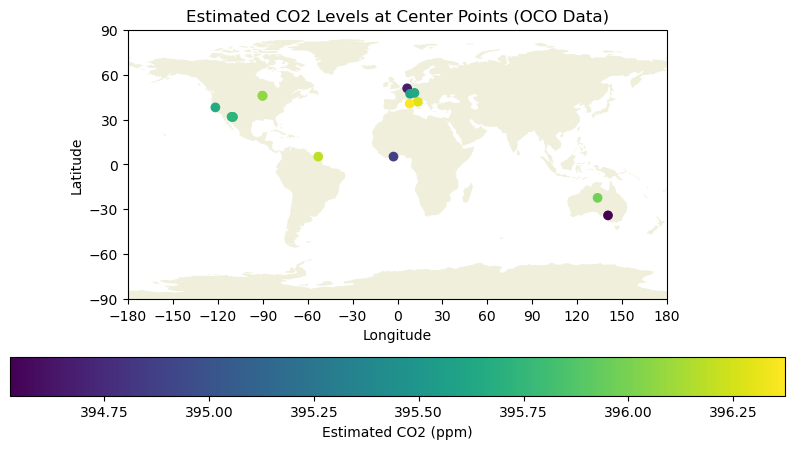

In [14]:
# Graph to show predictions per site on a given day

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global() 

# Add natural earth features
ax.add_feature(cfeature.LAND)  # Add land
#ax.add_feature(cfeature.COASTLINE, linestyle = '-')  # Add coastlines
#ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add country borders

longitude = np.array([result['Longitude'] for result in oco_results])
latitude = np.array([result['Latitude'] for result in oco_results])
predicted_values = np.array([result['Prediction'] for result in oco_results])

# Scatter plot for the centres with CO2 results
sc = ax.scatter(longitude, latitude, c=predicted_values, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
global_min = np.min(oco_co2)
global_max = np.max(oco_co2)
plt.colorbar(sc, ax=ax, orientation='horizontal', label='Estimated CO2 (ppm)')

ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xformatter = ccrs.cartopy.mpl.ticker.LongitudeFormatter()
ax.yformatter = ccrs.cartopy.mpl.ticker.LatitudeFormatter()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Estimated CO2 Levels at Centre Points (OCO Data)')

plt.show()

In [74]:
oco_co2_list = oco_co2.tolist()
oco_long_list = oco_long.tolist()
oco_lat_list = oco_lat.tolist()

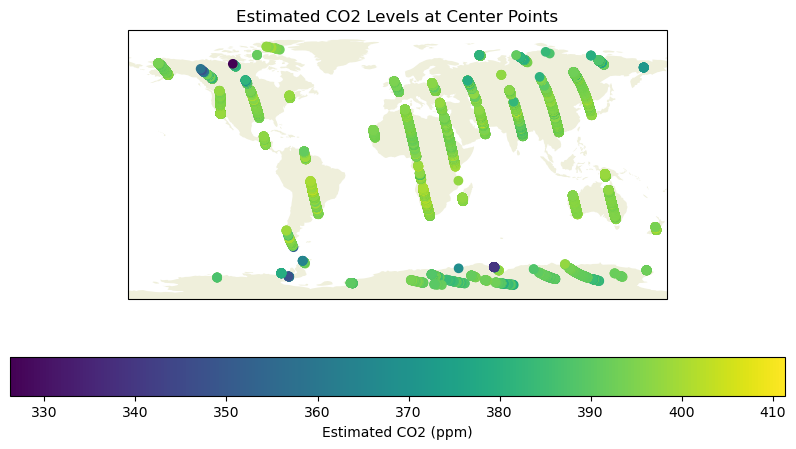

In [16]:
# Plot to show CO2 data for a day

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global() 

# Add natural earth features
ax.add_feature(cfeature.LAND) 

# Define a colormap and a normalization based on the entire dataset
global_min = np.min(oco_co2)
global_max = np.max(oco_co2)
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=global_min, vmax=global_max)

# Scatter plot for the centres with CO2 results, using the global normalization
sc = ax.scatter(oco_long_list, oco_lat_list, c=oco_co2_list, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', label='Estimated CO2 (ppm)')
cbar.set_label('Estimated CO2 (ppm)', rotation=0)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Estimated CO2 Levels at Centre Points')

plt.show()

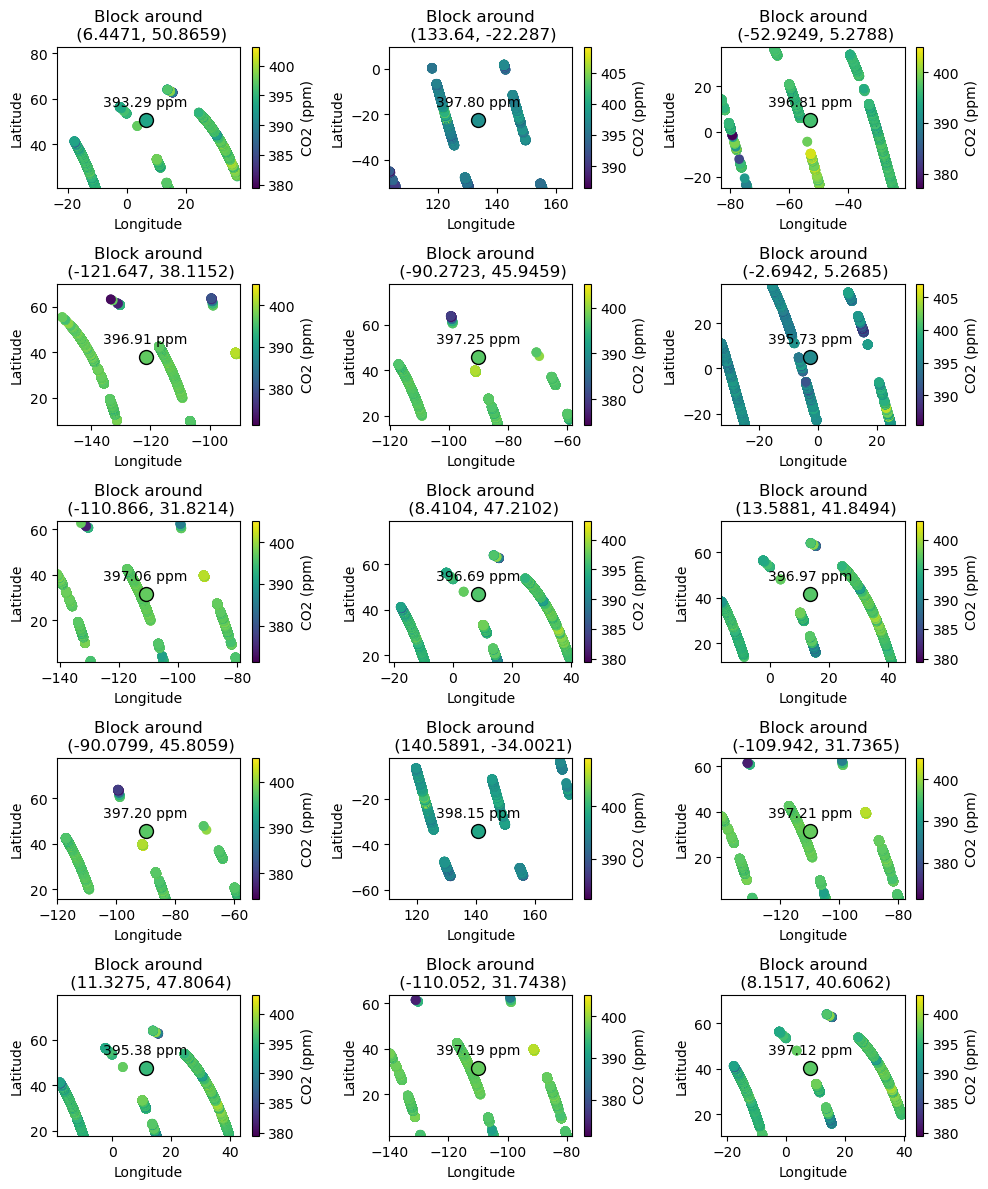

In [18]:
# Kriging process visualisation

fig, axs = plt.subplots(5, 3, figsize=(10, 12))
axs = axs.flatten()  # Flatten to simplify indexing

for i, centre in enumerate(centres):
    min_lon, max_lon = centre[0] - block_size, (centre[0] + block_size) + 1
    min_lat, max_lat = centre[1] - block_size, (centre[1] + block_size) + 1

    mask = (oco_long >= min_lon) & (oco_long <= max_lon) & \
           (oco_lat >= min_lat) & (oco_lat <= max_lat)
    block_long = oco_long[mask]
    block_lat = oco_lat[mask]
    block_co2 = oco_co2[mask]

    if i >= len(axs):  
        break

    # Define local normalization based on the block's CO2 range
    local_norm = mcolors.Normalize(vmin=np.min(block_co2), vmax=np.max(block_co2))
    cmap = plt.cm.viridis

    # Plot data points with local normalization
    sc = axs[i].scatter(block_long, block_lat, c=block_co2, cmap=cmap, norm=local_norm)

    result = graph_results[i]
    predicted_value = result['Prediction']
    
    # Add the predicted point with the local CO2 color from results
    predicted_color = cmap(local_norm(predicted_value))
    axs[i].scatter([centre[0]], [centre[1]], color=predicted_color, s=100, edgecolor='black')
    axs[i].annotate(f'{predicted_value:.2f} ppm', (centre[0], centre[1]), textcoords="offset points", xytext=(0,10), ha='center')

    axs[i].set_title(f'Block around\n ({centre[0]}, {centre[1]})')
    axs[i].set_xlim([min_lon, (max_lon + 1)])
    axs[i].set_ylim([min_lat, (max_lat + 1)])
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

    # Add a colorbar to each plot with the local normalization
    plt.colorbar(sc, ax=axs[i], orientation='vertical', label='CO2 (ppm)')

plt.tight_layout()
plt.show()

In [72]:
def leave_one_out_validation(longs, lats, values, num_iterations, subset_size, block_size):
    rmse_values = []
    cv_preds= []
    start_time = time.time()

    for i in range(num_iterations):
        loop_start_time = time.time()  # Record the start time

        # Randomly select subset_size indices to leave out
        leave_out_index = random.sample(range(len(coords)), subset_size)
        train_indices = [index for index in range(len(coords)) if index != leave_out_index]
        test_index = leave_out_index

        # Split data into training and test sets
        train_longs, test_long = longs[train_indices], longs[test_index]
        train_lats, test_lat = lats[train_indices], lats[test_index]
        train_values, test_value = values[train_indices], values[test_index]

        # Array to hold predictions for the current fold
        predictions = []

        # Perform Krigging interpolation for each point in the test set
        min_lon, max_lon = test_long - block_size, test_long + block_size
        min_lat, max_lat = test_lat - (block_size/2), test_lat + (block_size/2)
    
        # Subset the data
        mask = (longs >= min_lon) & (longs <= max_lon) & \
               (lats >= min_lat) & (lats <= max_lat)
        block_long = longs[mask]
        block_lat = lats[mask]
        block_co2 = values[mask]
    
        # Check if the block has any data points
        if block_long.size == 0 or block_lat.size == 0 or block_co2.size == 0:
            empty_blocks.append(centre)
            continue  # Skip this block
        # Apply Ordinary Kriging
        kriging_model = OrdinaryKriging(
            block_long,
            block_lat,
            block_co2,
            variogram_model='spherical',
            verbose=False,
            enable_plotting=False
        )
        # Predict CO2 at the centre point
        prediction, ss = kriging_model.execute('points', [test_long], [test_lat])
        loop_end_time = time.time()
        loop_time = loop_end_time - loop_start_time
        print(f"Estimated CO2 at {test_long, test_lat}: {round(prediction[0],2)}.\nTime Taken: {round(loop_time,2)} seconds.")       
        cv_preds.append(predicted_value)

        # Calculate and store the RMSE for this fold
        rmse = np.sqrt(mean_squared_error(test_value, prediction))
        rmse_values.append(rmse)

    # Calculate the average RMSE over all iterations
    average_rmse = np.mean(rmse_values)
    end_time = time.time()  # Record the end time
    time_taken = end_time - start_time
    print(f"Overall time taken = {time_taken:.2f} seconds./nAverage RMSE from {num_iterations} leave-one-out iterations: {average_rmse:.4f}")

In [73]:
leave_one_out_validation(oco_long, oco_lat, oco_co2, 10, 1, 25)

Estimated CO2 at (array([-94.076324], dtype=float32), array([37.297085], dtype=float32)): 395.15.
Time Taken: 339.48 seconds.
Estimated CO2 at (array([138.6269], dtype=float32), array([-6.4598703], dtype=float32)): 398.13.
Time Taken: 2.88 seconds.
Estimated CO2 at (array([117.74599], dtype=float32), array([-23.619892], dtype=float32)): 395.87.
Time Taken: 71.59 seconds.
Estimated CO2 at (array([142.86667], dtype=float32), array([-25.266699], dtype=float32)): 395.72.
Time Taken: 115.1 seconds.
Estimated CO2 at (array([82.4655], dtype=float32), array([24.036152], dtype=float32)): 388.17.
Time Taken: 43.74 seconds.
Estimated CO2 at (array([34.314247], dtype=float32), array([18.576725], dtype=float32)): 393.33.
Time Taken: 113.18 seconds.
Estimated CO2 at (array([-56.641808], dtype=float32), array([-17.721762], dtype=float32)): 399.29.
Time Taken: 2.75 seconds.
Estimated CO2 at (array([-158.10844], dtype=float32), array([66.04734], dtype=float32)): 390.8.
Time Taken: 8.41 seconds.
Estimat

IDW

Assesing IDW to be used instead of kriging - used kriging in the end

In [58]:
coords = np.column_stack((oco_long, oco_lat))

In [59]:
tree = cKDTree(coords)

# Function to perform IDW
def inverse_distance_weighting(interpolation_points, data_points, values, power=2):
    if interpolation_points.ndim == 1:
        interpolation_points = interpolation_points.reshape(1, -1)
        
    # Compute distances between each interpolation point and all data points
    distances = cKDTree(data_points).query(interpolation_points, k=len(data_points))[0]
    
    # Avoid division by zero in case of zero distance
    distances[distances == 0] = 1e-12
    
    # Calculate weights using IDW formula
    weights = 1 / distances**power
    
    # Normalize weights
    weights /= weights.sum(axis=1)[:, None]
    
    # Interpolate values
    interpolated_values = np.sum(weights * values, axis=1)
    return interpolated_values

In [60]:
results_idw = inverse_distance_weighting(centres, coords, oco_co2)

In [61]:
for centre, res in zip(centres, results_idw):
    print(f"Estimated CO2 at {centre}: {round(res,2)} ppm")

Estimated CO2 at [ 6.4471 50.8659]: 394.75 ppm
Estimated CO2 at [133.64  -22.287]: 395.13 ppm
Estimated CO2 at [-52.9249   5.2788]: 394.61 ppm
Estimated CO2 at [-121.647    38.1152]: 395.43 ppm
Estimated CO2 at [-90.2723  45.9459]: 394.5 ppm
Estimated CO2 at [-2.6942  5.2685]: 395.13 ppm
Estimated CO2 at [-110.866    31.8214]: 395.39 ppm
Estimated CO2 at [ 8.4104 47.2102]: 394.84 ppm
Estimated CO2 at [13.5881 41.8494]: 395.01 ppm
Estimated CO2 at [-90.0799  45.8059]: 394.51 ppm
Estimated CO2 at [140.5891 -34.0021]: 394.58 ppm
Estimated CO2 at [-109.942    31.7365]: 395.38 ppm
Estimated CO2 at [11.3275 47.8064]: 395.0 ppm
Estimated CO2 at [-110.052    31.7438]: 395.38 ppm
Estimated CO2 at [ 8.1517 40.6062]: 394.28 ppm


In [62]:
k=5
kf = KFold(n_splits=k)

In [69]:
def leave_one_out_validation(coords, values, num_iterations, subset_size):
    rmse_values = []

    for i in range(num_iterations):
        start_time = time.time()  # Record the start time

        # Randomly select subset_size indices to leave out
        leave_out_indices = random.sample(range(len(coords)), subset_size)
        train_indices = [index for index in range(len(coords)) if index not in leave_out_indices]
        test_indices = leave_out_indices

        # Split data into training and test sets
        train_coords, test_coords = coords[train_indices], coords[test_indices]
        train_values, test_values = values[train_indices], values[test_indices]

        # Array to hold predictions for the current fold
        predictions = []

        # Perform IDW interpolation for each point in the test set
        for test_point in test_coords:
            predicted_value = inverse_distance_weighting(test_point, train_coords, train_values)
            predictions.append(predicted_value)

        # Calculate and store the RMSE for this fold
        fold_rmse = np.sqrt(mean_squared_error(test_values, predictions))
        rmse_values.append(fold_rmse)

        end_time = time.time()  # Record the end time
        time_taken = end_time - start_time

        print(f"Iteration {i+1}, Time taken = {time_taken:.2f} seconds, RMSE = {fold_rmse:.4f}")

    # Calculate the average RMSE over all iterations
    average_rmse = np.mean(rmse_values)
    print(f"Average RMSE from {num_iterations} leave-one-out iterations: {average_rmse:.4f}")

# Example usage
leave_one_out_validation(coords, oco_co2, 200, 1)

Iteration 1, Time taken = 0.10 seconds, RMSE = 17.0174
Iteration 2, Time taken = 0.10 seconds, RMSE = 16.8234
Iteration 3, Time taken = 0.09 seconds, RMSE = 20.0949
Iteration 4, Time taken = 0.09 seconds, RMSE = 15.7023
Iteration 5, Time taken = 0.10 seconds, RMSE = 13.2575
Iteration 6, Time taken = 0.09 seconds, RMSE = 15.8461
Iteration 7, Time taken = 0.09 seconds, RMSE = 15.3815
Iteration 8, Time taken = 0.09 seconds, RMSE = 17.1101
Iteration 9, Time taken = 0.09 seconds, RMSE = 15.9106
Iteration 10, Time taken = 0.10 seconds, RMSE = 13.7504
Iteration 11, Time taken = 0.11 seconds, RMSE = 15.6150
Iteration 12, Time taken = 0.08 seconds, RMSE = 15.9384
Iteration 13, Time taken = 0.09 seconds, RMSE = 20.8560
Iteration 14, Time taken = 0.09 seconds, RMSE = 24.2695
Iteration 15, Time taken = 0.10 seconds, RMSE = 20.1282
Iteration 16, Time taken = 0.09 seconds, RMSE = 17.0286
Iteration 17, Time taken = 0.09 seconds, RMSE = 29.0689
Iteration 18, Time taken = 0.09 seconds, RMSE = 15.4109
I

Iteration 147, Time taken = 0.11 seconds, RMSE = 16.2342
Iteration 148, Time taken = 0.08 seconds, RMSE = 8.4839
Iteration 149, Time taken = 0.10 seconds, RMSE = 13.0061
Iteration 150, Time taken = 0.09 seconds, RMSE = 18.3679
Iteration 151, Time taken = 0.09 seconds, RMSE = 14.6354
Iteration 152, Time taken = 0.09 seconds, RMSE = 13.2537
Iteration 153, Time taken = 0.10 seconds, RMSE = 16.1912
Iteration 154, Time taken = 0.10 seconds, RMSE = 15.5404
Iteration 155, Time taken = 0.08 seconds, RMSE = 21.6686
Iteration 156, Time taken = 0.10 seconds, RMSE = 23.2777
Iteration 157, Time taken = 0.09 seconds, RMSE = 13.8103
Iteration 158, Time taken = 0.09 seconds, RMSE = 19.1144
Iteration 159, Time taken = 0.09 seconds, RMSE = 17.3795
Iteration 160, Time taken = 0.09 seconds, RMSE = 25.9454
Iteration 161, Time taken = 0.09 seconds, RMSE = 13.1529
Iteration 162, Time taken = 0.09 seconds, RMSE = 16.1549
Iteration 163, Time taken = 0.12 seconds, RMSE = 17.4703
Iteration 164, Time taken = 0.09

RMSE much higher for IDW as shown above